# 6.4 Machine Learning Part 

## This script contains the following:
1.importing libraries and data
2.data cleaning
3.data prep for regression analysis
4.regression analysis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\JocGa\Achievement 6'

In [4]:
df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Merged_Happiness_Report_2015_2019.csv'))

# 2. Data cleaning

In [5]:
df_merged.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption', 'Generosity'],
      dtype='object')

In [6]:
#drop unname columns for df
df_merged = df_merged.drop(columns = ['Unnamed: 0'])

In [7]:
df_merged.head(20)

,Country,Year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
0,Afghanistan,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,Albania,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,Algeria,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,Angola,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,Argentina,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
5,Armenia,2015,127,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855
6,Australia,2015,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
7,Austria,2015,13,7.200,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
8,Azerbaijan,2015,80,5.212,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799
9,Bahrain,2015,49,5.960,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362


In [8]:
df_merged.shape

(781, 10)

In [9]:
#missing values
df_merged.isnull().sum()

Country            0
Year               0
Happiness_Rank     0
Happiness_Score    0
GDP_per_Capita     0
Social_Support     0
Life_Expectancy    0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

#no missing values!

In [10]:
#duplicates check
dups = df_merged.duplicated()

In [11]:
dups.shape

(781,)

#no dups!

# 3. Data prep for regression analysis for Happiness Score vs GDP per Capita 

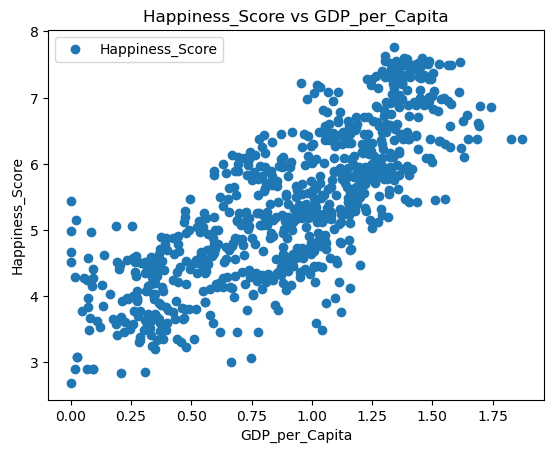

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_merged.plot(x = 'GDP_per_Capita', y='Happiness_Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness_Score vs GDP_per_Capita')  
plt.xlabel('GDP_per_Capita')  
plt.ylabel('Happiness_Score')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_merged['GDP_per_Capita'].values.reshape(-1,1)
y = df_merged['Happiness_Score'].values.reshape(-1,1)

In [14]:
X

array([[0.31982   ],
       [0.87867   ],
       [0.93929   ],
       [0.75778   ],
       [1.05351   ],
       [0.76821   ],
       [1.33358   ],
       [1.33723   ],
       [1.02389   ],
       [1.32376   ],
       [0.39753   ],
       [1.03192   ],
       [1.30782   ],
       [0.28665   ],
       [0.77042   ],
       [0.68133   ],
       [0.83223   ],
       [0.99355   ],
       [0.98124   ],
       [1.01216   ],
       [0.25812   ],
       [0.0153    ],
       [0.46038   ],
       [0.4225    ],
       [1.32629   ],
       [0.0785    ],
       [0.34193   ],
       [1.10715   ],
       [0.89012   ],
       [0.91861   ],
       [0.23906   ],
       [0.67866   ],
       [0.        ],
       [0.95578   ],
       [1.08254   ],
       [1.20813   ],
       [1.17898   ],
       [1.32548   ],
       [0.44025   ],
       [0.89537   ],
       [0.86402   ],
       [0.8818    ],
       [0.76454   ],
       [1.15174   ],
       [0.19073   ],
       [1.29025   ],
       [1.27778   ],
       [1.060

In [15]:
y

array([[3.575     ],
       [4.959     ],
       [5.605     ],
       [4.033     ],
       [6.574     ],
       [4.35      ],
       [7.284     ],
       [7.2       ],
       [5.212     ],
       [5.96      ],
       [4.694     ],
       [5.813     ],
       [6.937     ],
       [3.34      ],
       [5.253     ],
       [5.89      ],
       [4.949     ],
       [4.332     ],
       [6.983     ],
       [4.218     ],
       [3.587     ],
       [2.905     ],
       [3.819     ],
       [4.252     ],
       [7.427     ],
       [3.678     ],
       [3.667     ],
       [6.67      ],
       [5.14      ],
       [6.477     ],
       [3.956     ],
       [3.989     ],
       [4.517     ],
       [7.226     ],
       [5.759     ],
       [5.689     ],
       [6.505     ],
       [7.527     ],
       [4.369     ],
       [4.885     ],
       [5.975     ],
       [4.194     ],
       [6.13      ],
       [5.429     ],
       [4.512     ],
       [7.406     ],
       [6.575     ],
       [3.896

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis for Happiness Score vs GDP per Capita 

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

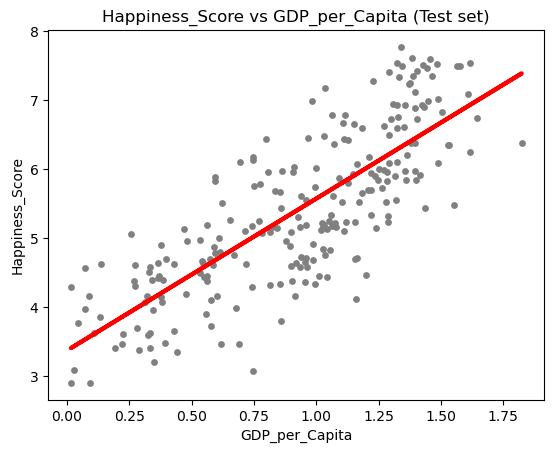

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness_Score vs GDP_per_Capita (Test set)')
plot_test.xlabel('GDP_per_Capita')
plot_test.ylabel('Happiness_Score')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.19892283]]
Mean squared error:  0.49251938015878993
R2 score:  0.6262683571922962


#observation, 1)the slope shows a positive relationship as x (GDP_per_Capita) rises, so does y (happiness score). 2)R2 score 0.63 is close to 1, meaning its a good fit. 

In [23]:
y_predicted

array([[5.79551658],
       [6.44683078],
       [6.73845974],
       [5.06683079],
       [5.48033823],
       [5.91661135],
       [4.21932196],
       [5.4240458 ],
       [5.42615677],
       [4.60510098],
       [4.86505763],
       [3.60815335],
       [4.64371406],
       [4.94496649],
       [4.40706599],
       [6.50985191],
       [4.41982083],
       [5.35307939],
       [4.81160182],
       [5.25875105],
       [6.27217034],
       [3.53325803],
       [4.63491837],
       [6.36766956],
       [5.80727407],
       [6.1499762 ],
       [5.02412771],
       [6.41384694],
       [4.32066021],
       [6.35447602],
       [6.40505124],
       [6.53478769],
       [4.6817994 ],
       [3.79273093],
       [6.39845448],
       [5.59364872],
       [3.42990866],
       [3.40800739],
       [6.21201973],
       [5.27264997],
       [4.09890894],
       [6.4403805 ],
       [5.01093417],
       [4.67155242],
       [6.29730403],
       [5.62419176],
       [5.37815429],
       [5.614

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.795517
1,6.886,6.446831
2,6.344,6.738460
3,5.253,5.066831
4,5.548,5.480338
5,4.692,5.916611
6,4.390,4.219322
7,4.574,5.424046
8,5.163,5.426157
9,5.185,4.605101


The regression model generally captures the trend and relationship between the independent variable(s) and the dependent variable. In many cases, the predicted values closely match the actual values, indicating that the model is able to estimate the Happiness Score reasonably well.

However, there are instances where the predicted values deviate from the actual values. For example, in data point 5, the predicted value (5.916611) is higher than the corresponding actual value (4.692). Similarly, in data point 14, the predicted value (4.407066) is lower than the actual value (5.129). These deviations suggest that the model may not accurately capture the underlying factors contributing to Happiness Score in those specific cases.

Overall, the model seems to perform reasonably well, as indicated by the relatively close alignment between the predicted and actual values. 

## compare how the regression fits the training set

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.19892283]]
Mean squared error:  0.47103112091793026
R2 score:  0.6224175558688017


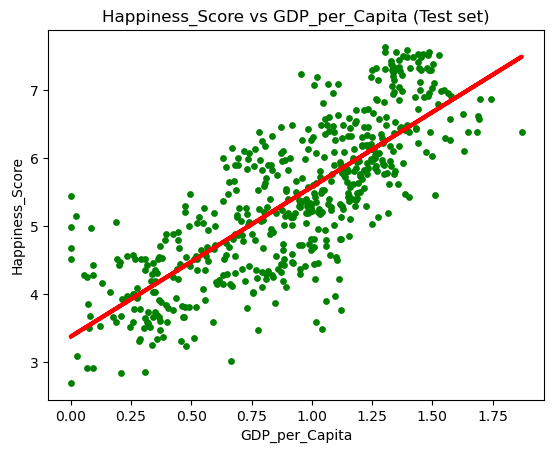

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness_Score vs GDP_per_Capita (Test set)')
plot_test.xlabel('GDP_per_Capita')
plot_test.ylabel('Happiness_Score')
plot_test.show()

#observation, it shows a good fit too. There can be sampling bias, the samples may not fully capture the diversity and characteristics of the entire population in each country. Certain demographic groups or regions may be 
underrepresented or overrepresented, leading to a skewed representation of happiness levels


# Data prep for regression analysis for Happiness Score vs Social Support

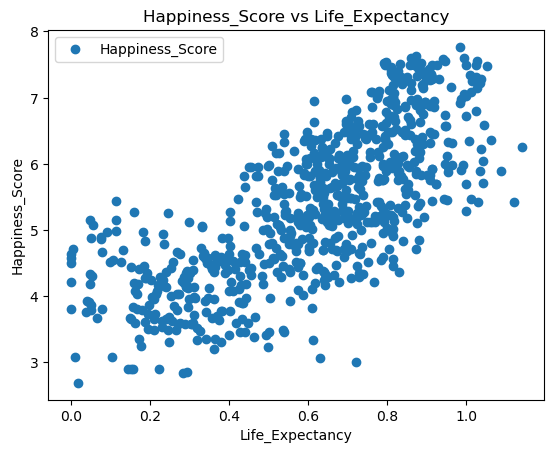

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_merged.plot(x = 'Life_Expectancy', y='Happiness_Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness_Score vs Life_Expectancy')  
plt.xlabel('Life_Expectancy')  
plt.ylabel('Happiness_Score')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_1 = df_merged['Life_Expectancy'].values.reshape(-1,1)
y_1 = df_merged['Happiness_Score'].values.reshape(-1,1)

In [31]:
X_1

array([[0.30335   ],
       [0.81325   ],
       [0.61766   ],
       [0.16683   ],
       [0.78723   ],
       [0.7299    ],
       [0.93156   ],
       [0.89042   ],
       [0.64045   ],
       [0.74716   ],
       [0.60164   ],
       [0.73608   ],
       [0.89667   ],
       [0.3191    ],
       [0.57407   ],
       [0.5392    ],
       [0.79081   ],
       [0.04776   ],
       [0.69702   ],
       [0.76649   ],
       [0.27125   ],
       [0.22396   ],
       [0.61114   ],
       [0.23402   ],
       [0.90563   ],
       [0.06699   ],
       [0.1501    ],
       [0.85857   ],
       [0.81658   ],
       [0.69077   ],
       [0.36315   ],
       [0.31051   ],
       [0.09806   ],
       [0.86027   ],
       [0.78805   ],
       [0.92356   ],
       [0.84483   ],
       [0.87464   ],
       [0.36291   ],
       [0.66825   ],
       [0.79075   ],
       [0.61712   ],
       [0.67737   ],
       [0.77361   ],
       [0.44055   ],
       [0.88911   ],
       [0.94579   ],
       [0.433

In [32]:
y_1

array([[3.575     ],
       [4.959     ],
       [5.605     ],
       [4.033     ],
       [6.574     ],
       [4.35      ],
       [7.284     ],
       [7.2       ],
       [5.212     ],
       [5.96      ],
       [4.694     ],
       [5.813     ],
       [6.937     ],
       [3.34      ],
       [5.253     ],
       [5.89      ],
       [4.949     ],
       [4.332     ],
       [6.983     ],
       [4.218     ],
       [3.587     ],
       [2.905     ],
       [3.819     ],
       [4.252     ],
       [7.427     ],
       [3.678     ],
       [3.667     ],
       [6.67      ],
       [5.14      ],
       [6.477     ],
       [3.956     ],
       [3.989     ],
       [4.517     ],
       [7.226     ],
       [5.759     ],
       [5.689     ],
       [6.505     ],
       [7.527     ],
       [4.369     ],
       [4.885     ],
       [5.975     ],
       [4.194     ],
       [6.13      ],
       [5.429     ],
       [4.512     ],
       [7.406     ],
       [6.575     ],
       [3.896

In [33]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# Regression analysis for Happiness Score vs Social Support

In [34]:
# Create a regression object.

regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression_1.fit(X_1_train, y_1_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_1_predicted = regression.predict(X_test)

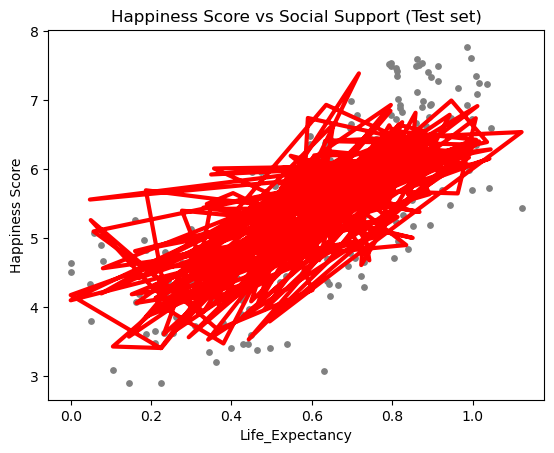

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_1_test, y_1_test, color='gray', s=15)
plot_test.plot(X_1_test, y_1_predicted, color='red', linewidth=3)
plot_test.title('Happiness Score vs Social Support (Test set)')
plot_test.xlabel('Life_Expectancy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.

rmse_1 = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2_1 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_1)
print('R2 score: ', r2_1)

Slope: [[2.19892283]]
Mean squared error:  0.49251938015878993
R2 score:  0.6262683571922962
